# Ejercicio II. PCA - Trabajo Final Matemáticas para Ciencia de Datos

----------------------------

## **Universidad de Sonora**

### **Maestría en Ciencia de Datos**

----------------------------

Profesora: **Dra. Olivia Gutú**

----------------------------

Author: **Luis Rafael Arce Rivera**

----------------------------
Fecha: **2020-11-22**

Importando Librerias a Utilizar

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

1. Bajar los datos con columnas [’target’,’columna1’, ’columna2’, . . ., ’columnaN’] e.g. [’municipio’,’indicador uno’,’indicador dos’, ’indicador 20’]:

Fuente de Datos https://www.nba.com/stats/alltime-leaders/

Tomé los primeros 300 registros de las estadísticas de de los juegadores de la NBA.

In [2]:
data = './data/nbaplayers.csv'
df = pd.read_csv(data)
df.head()

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%
0,A.C. Green,1278,36554,12331,4544,9202,49.4,124,489,25.4,...,73.4,3354,6119,9473,1400,1033,546,1434,50.1,55.7
1,Adrian Dantley,955,34151,23177,8169,15121,54.0,7,41,17.1,...,81.8,2207,3248,5455,2830,944,150,2503,54.0,61.7
2,Al Harrington,981,28003,13237,5028,11318,44.4,977,2778,35.2,...,72.7,1495,3987,5482,1649,858,246,1838,48.7,52.3
3,Al Horford,853,27811,11890,4997,9612,52.0,464,1275,36.4,...,75.4,1798,5256,7054,2818,688,1008,1344,54.4,56.9
4,Al Jefferson,915,26298,14343,6161,12344,49.9,8,66,12.1,...,71.1,2054,5636,7690,1347,628,1093,1211,49.9,52.8


Informacion de Columnas:

    GP -> Games Played 
    MIN -> Minutes Played 
    PTS -> Points 
    FGM -> Field Goals Made 
    FGA -> Field Goals Attempted 
    FG% -> Field Goal Percentage 
    3PM -> 3 Point Field Goals Made 
    3PA -> 3 Point Field Goals Attempted 
    3P% -> 3 Point Field Goals Percentage 
    FTM -> Free Throws Made 
    FTA -> Free Throws Attempted 
    FT% -> Free Throw Percentage 
    OREB -> Offensive Rebounds 
    DREB -> Defensive Rebounds 
    REB -> Rebounds 
    AST -> Assists 
    STL -> Steals 
    BLK -> Blocks 
    TOV -> Turnovers 
    eFG% -> Effective Field Goal Percentage 
    TS% -> True Shooting Percentage

In [3]:
df.shape # Tamaño en Renglones y Columnas de DataFrame

(300, 22)

In [4]:
df.describe() # Obteniendo un poco de información de nuestro datos

,GP,MIN,PTS,FGM,FGA,FG%,FTM,FTA,FT%,REB,AST,EFG%,TS%
count,300.000000,300.000000,300.000000,300.0000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,958.906667,30759.406667,16102.916667,6096.7900,12975.020000,46.907667,3383.626667,4372.013333,77.919333,5866.776667,3340.670000,49.006667,53.984000
std,205.989036,7377.735625,4831.734936,1831.1233,3590.532884,3.537176,1409.756700,1885.027417,6.616880,3460.573953,2105.113024,3.370513,3.253094
min,509.000000,16305.000000,11208.000000,3722.0000,8045.000000,37.500000,1173.000000,1384.000000,51.100000,1580.000000,946.000000,37.500000,44.600000
25%,829.750000,25188.250000,12663.250000,4822.7500,10504.000000,44.400000,2412.750000,3146.250000,73.975000,3278.750000,1945.250000,46.900000,51.700000
50%,927.000000,29358.000000,14599.500000,5602.0000,11857.500000,46.500000,3065.500000,3903.500000,78.450000,5059.500000,2729.000000,49.000000,53.800000
75%,1073.000000,34778.500000,17950.500000,6876.5000,14720.250000,49.300000,3980.500000,5147.000000,82.425000,7262.500000,4170.500000,51.025000,55.900000
max,1611.000000,57446.000000,38387.000000,15837.0000,28307.000000,59.900000,9787.000000,13188.000000,90.600000,23924.000000,15806.000000,59.900000,64.300000


In [5]:
df.dtypes # formato de los datos de nuestras columnas

PLAYER     object
GP          int64
MIN         int64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM        object
3PA        object
3P%        object
FTM         int64
FTA         int64
FT%       float64
OREB       object
DREB       object
REB         int64
AST         int64
STL        object
BLK        object
TOV        object
EFG%      float64
TS%       float64
dtype: object

<AxesSubplot:>

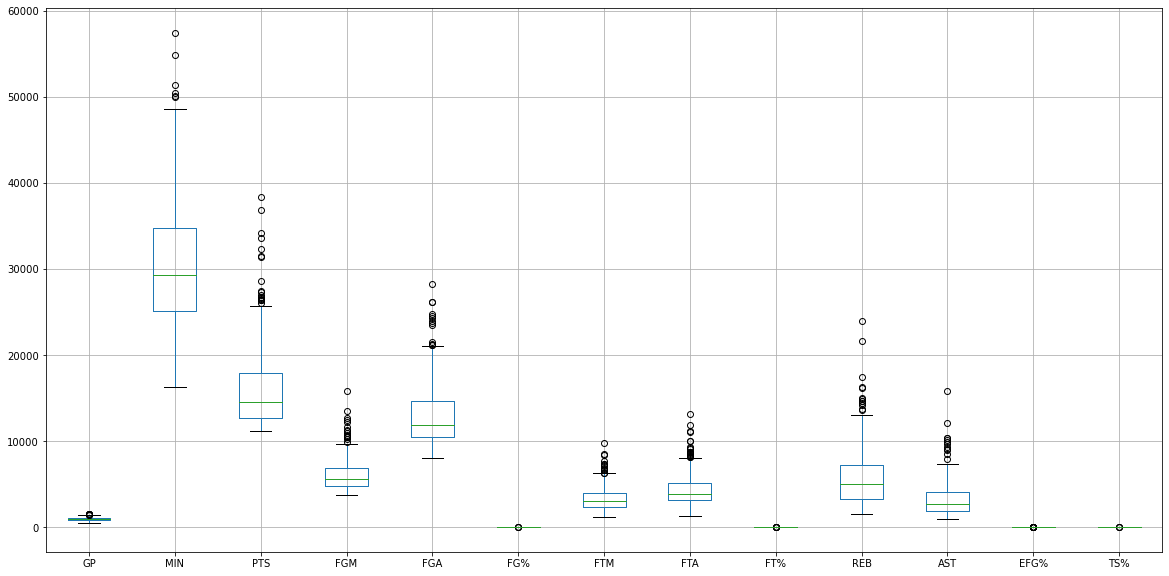

In [6]:
df.boxplot(figsize=(20,10)) # en busqueda de outliers

In [7]:
df.applymap(np.isreal) # No todos los datos son númericos

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%
0,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
1,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
2,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
3,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
4,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
296,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
297,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True
298,False,True,True,True,True,True,True,False,False,False,...,True,False,False,True,True,False,False,False,True,True


In [8]:
df #buscando datos extraños, encontramos "-" en celdas sin datos

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%
0,A.C. Green,1278,36554,12331,4544,9202,49.4,124,489,25.4,...,73.4,3354,6119,9473,1400,1033,546,1434,50.1,55.7
1,Adrian Dantley,955,34151,23177,8169,15121,54.0,7,41,17.1,...,81.8,2207,3248,5455,2830,944,150,2503,54.0,61.7
2,Al Harrington,981,28003,13237,5028,11318,44.4,977,2778,35.2,...,72.7,1495,3987,5482,1649,858,246,1838,48.7,52.3
3,Al Horford,853,27811,11890,4997,9612,52.0,464,1275,36.4,...,75.4,1798,5256,7054,2818,688,1008,1344,54.4,56.9
4,Al Jefferson,915,26298,14343,6161,12344,49.9,8,66,12.1,...,71.1,2054,5636,7690,1347,628,1093,1211,49.9,52.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Willis Reed,650,23073,12183,4859,10202,47.6,-,-,-,...,74.7,47,94,8414,1186,12,21,-,47.6,52.3
296,Wilt Chamberlain,1045,47859,31419,12681,23497,54.0,-,-,-,...,51.1,-,-,23924,4643,-,-,-,54.0,54.7
297,World Free,886,26893,17955,6512,14294,45.6,213,632,33.7,...,75.3,1008,1422,2430,3319,910,223,1869,46.3,52.7
298,Xavier McDaniel,870,25204,13606,5673,11685,48.5,74,283,26.1,...,71.8,2082,3231,5313,1775,791,416,1887,48.9,52.2


In [9]:
df.replace('-',0, inplace=True) #trasnformando "-" a 0's para poder ejecutar PCA

In [10]:
df.keys() 

Index(['PLAYER', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'EFG%', 'TS%'],
      dtype='object')

In [11]:
# Se separan las características: en este caso todos los datos con excepción de la columna del nombre de los jugadores
x =df.loc[:,'GP':'TS%'].values 

# Se separan el target: Columna de Jugadores
y = df.loc[:,['PLAYER']].values 

In [12]:
# Se estandarizan las características:

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

### ¿Qué efecto hace la función StandardScaler a x? ¿Podrías explicarlo en términos de lo visto en álgebra lineal y estadístico?

estandarizará los datos eliminando la media y escalandolos de manera que su varianza sea igual a 1

### Dejemos que sklearn haga su trabajo, por ejemplo pidiéndole 2 componentes:

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [14]:
principalComponents.shape # obtenemos datos 300 renglones con 2 columnas(componentes principales)

(300, 3)

### ¿Cuál es el máximo de componentes principales que puedo pedir?
La cantidad máxima de componentes principales es el número original de columnas de nuestro dataframe original, con excepción de la columna elegida como "Target", es decir todas las características

In [15]:
print(pca.components_) #componentes resultantes

[[ 0.26763261  0.30844562  0.31134855  0.30255833  0.27534915  0.16282158
   0.04717607  0.05354046  0.04580014  0.25898196  0.27081704 -0.0604377
   0.23147355  0.27024856  0.21457791  0.12563526  0.19553703  0.22207941
   0.24868147  0.16227245  0.16431538]
 [-0.04219312 -0.0234495   0.02687968  0.0815363   0.03906109  0.17044718
  -0.43018709 -0.43162665 -0.39017565  0.08218132  0.14525269 -0.26357641
   0.122128    0.01141015  0.28209816 -0.20763165 -0.28703211  0.13364699
  -0.22389621 -0.15393186 -0.16427964]
 [ 0.06319917  0.15974185  0.22802379  0.1982024   0.30502434 -0.337327
   0.05749368  0.06428638 -0.1338375   0.23965133  0.19800398  0.13282286
  -0.30760255 -0.2739248  -0.02921105  0.24035378 -0.05810727 -0.26929903
  -0.15145859 -0.35927517 -0.27668556]]


In [16]:
# Fácilmente se puede formar el DataFrame de componentes principales:
nba_players_pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3'])
nba_players_pca_df['nombres'] = y
nba_players_pca_df.head()

,PC1,PC2,PC3,nombres
0,0.917072,1.113802,-2.343342,A.C. Green
1,3.348319,0.920697,-0.285745,Adrian Dantley
2,-1.130867,-0.882579,-0.711816,Al Harrington
3,-0.609939,-0.164817,-3.352186,Al Horford
4,-0.386736,2.037376,-1.923080,Al Jefferson


### ¿Cómo sé qué tantas componentes es pertinente tomar en cuenta para mis datos?

    1.explained_variance_ratio_ -> nos da el porcentage de la varianza explicada por cada uno de los componentes, mientras más grande el porcentage mas información de los datos obtenemos, lo recomendable es obtener al menos el 80%.
    2.Grafica SCREE con el metodo del "codo", para ver en que momento la varianza explicada que añade cada componente empieza a reducirse.

Usa los comandos explained_variance_ o explained_variance_ratio_ para
tomar una decisión informada. Por ejemplo, grafica número de componentes vs el
radio de la varianza explicada.

In [17]:
print(pca.explained_variance_ratio_) #mostrando porcentaje de varianza de los 3 PCA
print(sum(pca.explained_variance_ratio_)) #suma de porcentajes de varianza de los 3 PCA

[0.36998073 0.19850879 0.15035248]
0.7188419995658648


Grafica SCREE con el metodo del "codo", para ver en que momento la varianza explicada que añade cada componente empieza a reducirse.

Text(0.5, 1.0, 'Grafico SCREE de los 3 Componentes Principales')

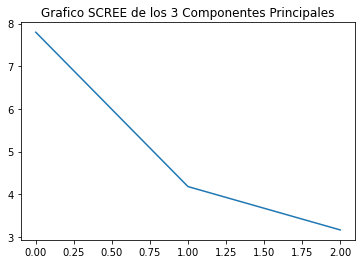

In [18]:
plt.plot(pca.explained_variance_)
plt.title("Grafico SCREE de los 3 Componentes Principales")

<IPython.core.display.Javascript object>


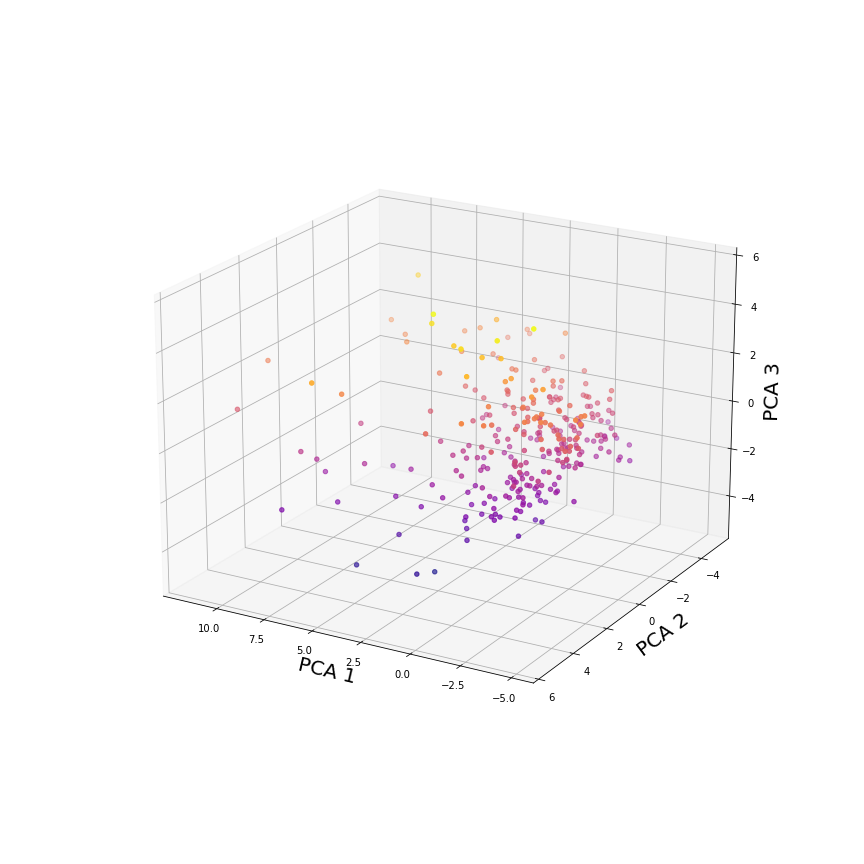

IntSlider(value=20, max=90)

In [19]:
%matplotlib notebook
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PCA 1", size=20)
ax.set_ylabel("PCA 2", size=20)
ax.set_zlabel("PCA 3", size=20)
ax.scatter(nba_players_pca_df["PC1"], nba_players_pca_df["PC2"], nba_players_pca_df["PC3"], 
           c=nba_players_pca_df["PC3"], cmap = cm.plasma)
ax.view_init(20,120)
plt.show()

def actualizar_grafica(angulo1=20, angulo2=120):
    ax.view_init(angulo1,angulo2)
    fig.canvas.draw_idle()

angulo1_slider = widgets.IntSlider(20, min=0, max=90)
display(angulo1_slider)

def actualizar_angulo1(value):
    actualizar_grafica(angulo1=value['new'])
    
angulo1_slider.observe(actualizar_angulo1, names='value')

In [20]:
#Grafica las dos o tres primeras componentes principales.

from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool

output_notebook()

Loading BokehJS ...

In [21]:
source = ColumnDataSource(nba_players_pca_df)

hover = HoverTool(tooltips=[
    ("(x,y)", "($x,$y)"),
     ("nombres", "@nombres"),
])
    
p = figure(plot_width=800, plot_height=800, tools=[hover, "box_zoom", "pan", "zoom_out", "zoom_in"],
          title="Componentes Principales 1 & 2 de Top 300 Jugadores de la NBA All-Time")

p.circle('PC1', 'PC2', size=20, source=source, fill_alpha=0.5)
    
show(p)

In [22]:
source = ColumnDataSource(nba_players_pca_df)

hover = HoverTool(tooltips=[
    ("(x,y)", "($x,$y)"),
     ("nombres", "@nombres"),
])
    
p = figure(plot_width=800, plot_height=800, tools=[hover, "box_zoom", "pan", "zoom_out", "zoom_in"],
          title="2 Componentes Principales 2 & 3 de Top 300 Jugadores de la NBA All-Time")

p.circle('PC2', 'PC3', size=20, source=source, fill_alpha=0.5)
    
show(p)

<IPython.core.display.Javascript object>


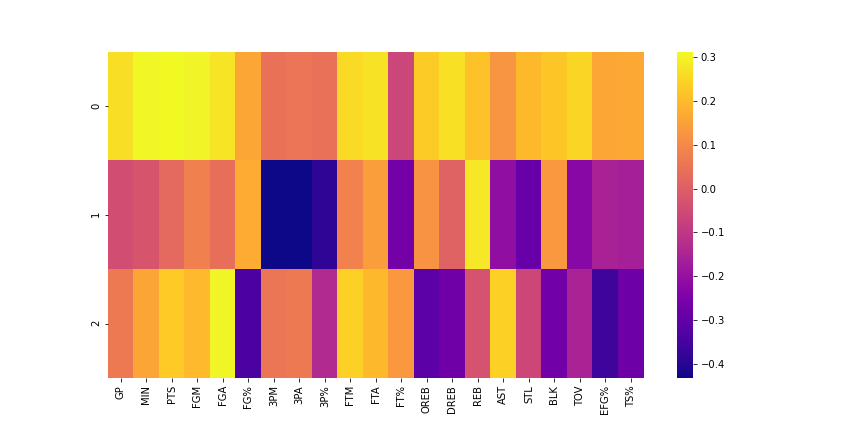

<AxesSubplot:>

In [23]:
#Grafico de las relación entre cada componente principal con cada una de las características
features_names = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'EFG%', 'TS%']

map= pd.DataFrame(pca.components_,columns=features_names)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='plasma')